In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from keras.datasets import mnist
import pandas as pd

In [2]:
def generate_binary_dataset(min_value, max_value, size, positive_condition):
    data = pd.DataFrame(
        np.concatenate((
            np.random.uniform(min_value, max_value, (size, 2)),
            -np.ones((size, 1))), axis=1), 
        columns=['x', 'y', 'target'])
    data.target[positive_condition(data.x, data.y)] = 1
    return data

In [3]:
def plot_separator(svc):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, label="support vectors", facecolors='none', edgecolors='k')

In [4]:
def plot_binary(data, svc=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(data.x, data.y, c=data.target, label="data", s=30, cmap=plt.cm.Paired)
    
    if svc:
        plot_separator(svc)
    
    plt.grid()
    plt.legend()

In [5]:
dataset = generate_binary_dataset(-4, 4, 500, lambda x, y: x - y > 1)
dataset.head()

x         y  target
0 -0.721806 -1.923277     1.0
1 -2.929571  0.392074    -1.0
2 -1.483103 -3.441287     1.0
3 -0.789479 -3.847159     1.0
4 -1.193797  1.557751    -1.0

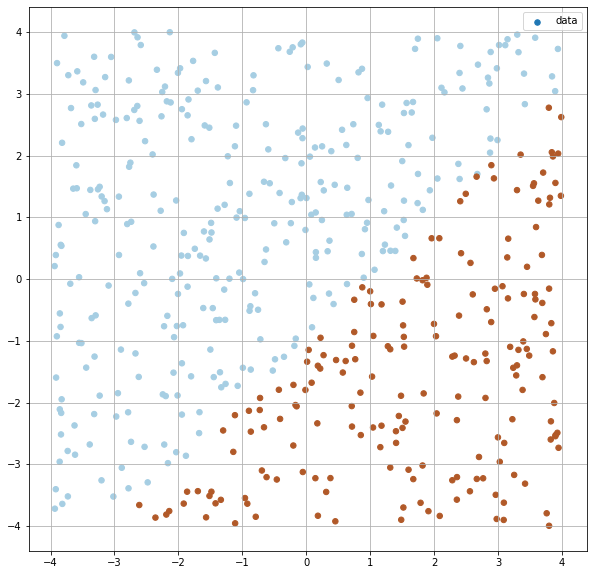

In [6]:
plot_binary(dataset)

In [7]:
model = SVC(kernel="linear")

In [8]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

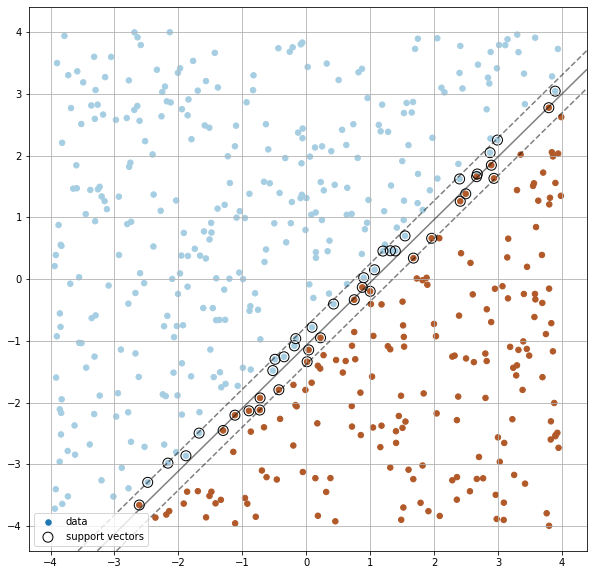

In [9]:
plot_binary(dataset, model)

In [15]:
dataset = generate_binary_dataset(-2, 2, 2000, lambda x, y: x ** 2 + y ** 2 < 1)
dataset.head()

x         y  target
0  0.727319  1.816410    -1.0
1 -1.978555 -1.161331    -1.0
2  1.838592 -0.537376    -1.0
3 -1.378294  1.806649    -1.0
4  1.918944 -0.865445    -1.0

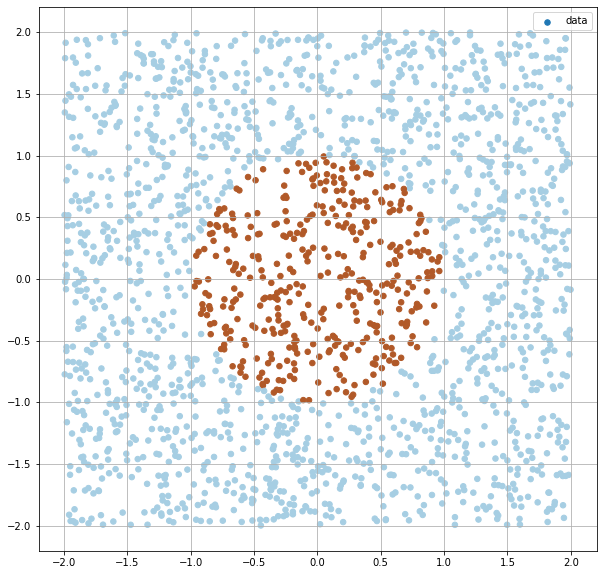

In [16]:
plot_binary(dataset)

In [17]:
model = SVC(kernel='rbf')

In [18]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

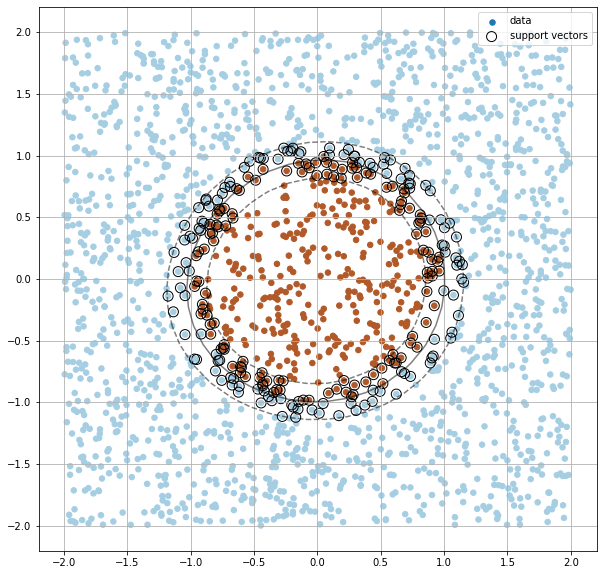

In [19]:
plot_binary(dataset, model)

In [21]:
dataset = generate_binary_dataset(-3, 3, 1000, lambda x, y: x ** 2 - y ** 2 < 1)
dataset.head()

x         y  target
0 -2.388200 -1.905574    -1.0
1 -0.427509 -2.804784     1.0
2 -1.544380  2.130838     1.0
3 -2.444884 -0.780738    -1.0
4 -0.255851  2.090300     1.0

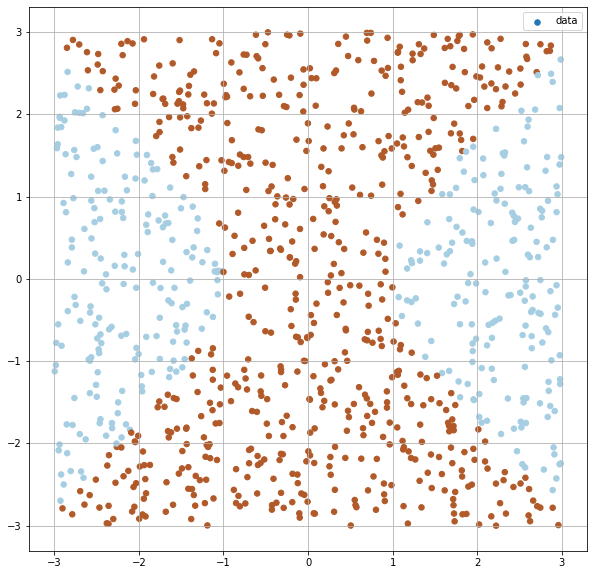

In [22]:
plot_binary(dataset)

In [23]:
model = SVC(kernel='rbf', C=10)

In [24]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

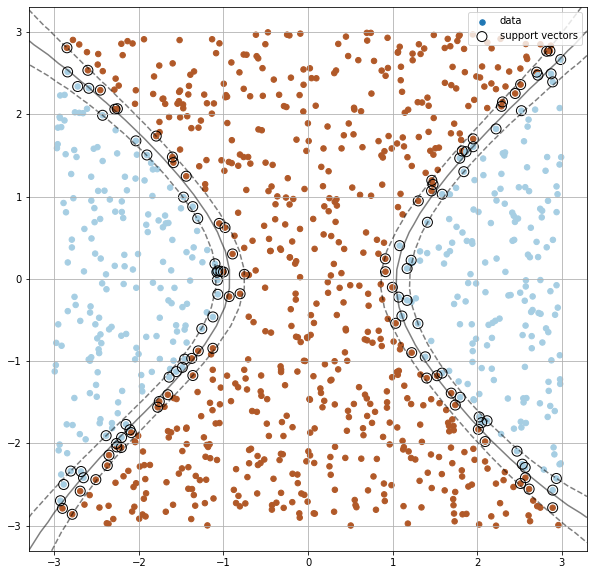

In [25]:
plot_binary(dataset, model)

In [26]:
dataset = generate_binary_dataset(-5, 5, 1000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 3) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 3))
dataset.head()

x         y  target
0 -2.429897 -1.452116     1.0
1  1.900090 -3.158947    -1.0
2 -2.587430  2.550011    -1.0
3 -4.488979  4.548741    -1.0
4 -4.896671 -4.593649    -1.0

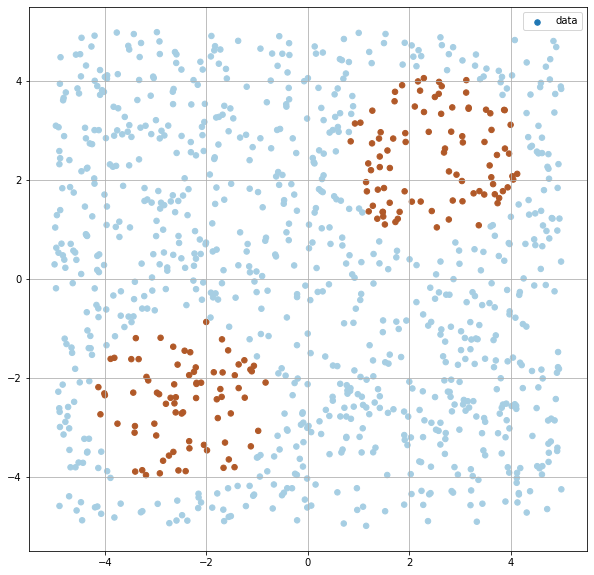

In [27]:
plot_binary(dataset)

In [28]:
model = SVC(kernel='rbf', tol=1e-11, C=5)

In [29]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-11, verbose=False)

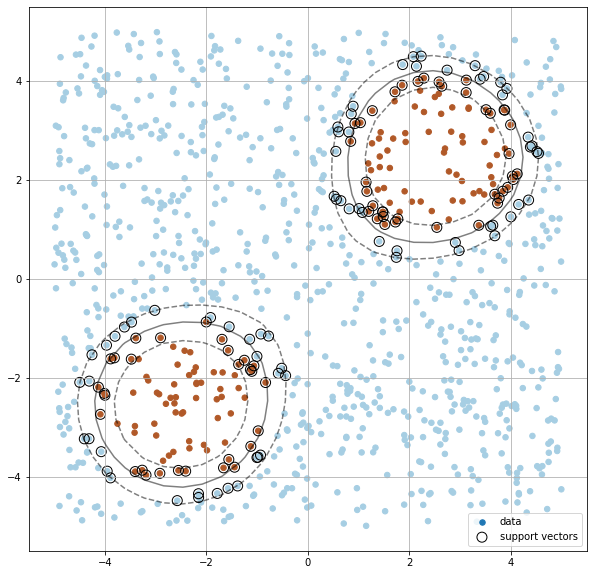

In [30]:
plot_binary(dataset, model)

In [31]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 2.5) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 2.5) | ((x - 2.5) ** 2 + (y + 2.5) ** 2 < 2.5) | ((x + 2.5) ** 2 + (y - 2.5) ** 2 < 2.5))
dataset.head()

x         y  target
0 -0.792043  2.510236    -1.0
1  2.090714  2.948725     1.0
2  4.289544  2.375339    -1.0
3  1.663288  3.322442     1.0
4 -4.679161 -2.072914    -1.0

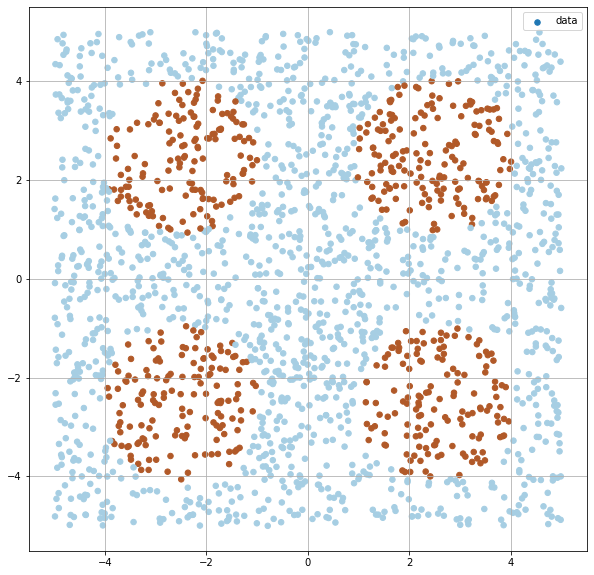

In [32]:
plot_binary(dataset)

In [39]:
model = SVC(kernel='rbf', tol=1e-12, C=10, gamma = 0.1)

In [40]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-12, verbose=False)

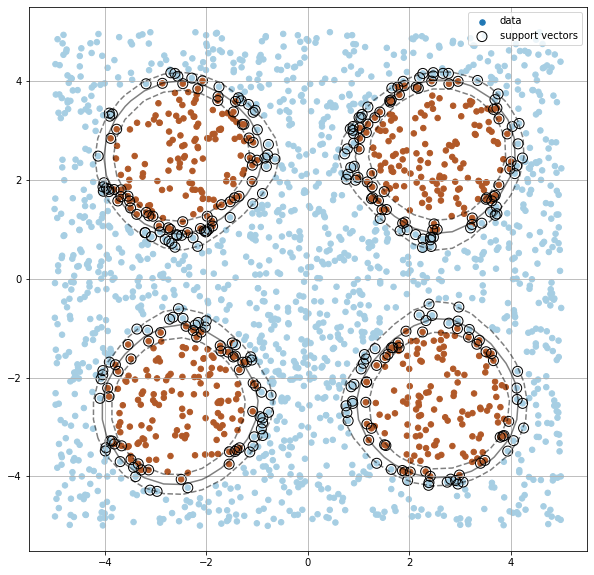

In [41]:
plot_binary(dataset, model)

In [42]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: np.abs(x - y) > 2)
dataset.head()

x         y  target
0 -0.352313  0.075367    -1.0
1  2.025659 -1.069105     1.0
2 -3.386137  4.702736     1.0
3  0.943739  0.201218    -1.0
4 -2.946682  1.032146     1.0

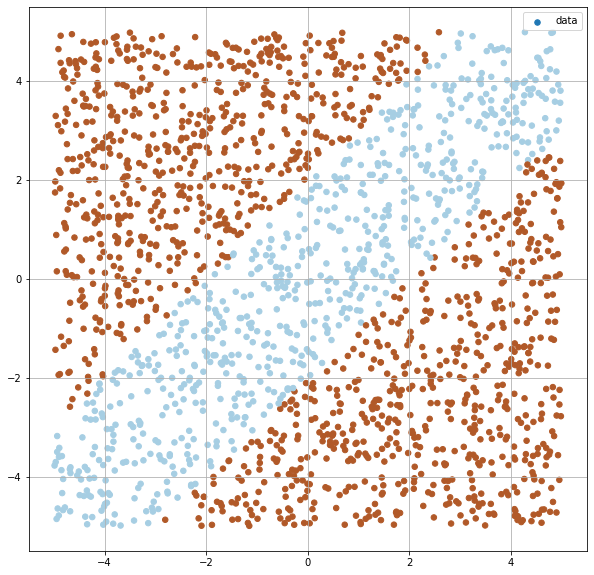

In [43]:
plot_binary(dataset)

In [44]:
model = SVC(kernel='poly', degree=2, tol=1e-3)

In [45]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

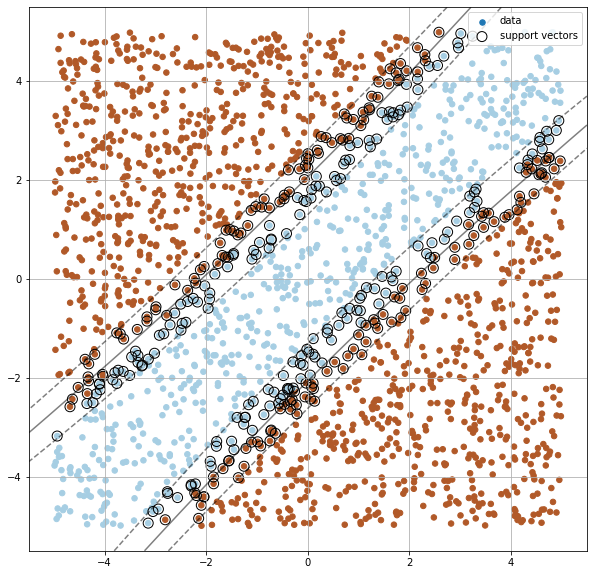

In [46]:
plot_binary(dataset, model)

In [47]:
dataset = generate_binary_dataset(-5, 5, 2000, lambda x, y: x * y > 0)
dataset.head()

x         y  target
0 -0.043337  4.865999    -1.0
1  1.463672 -4.228023    -1.0
2  1.285029  3.967671     1.0
3 -1.985265  3.425911    -1.0
4  1.742248  3.743797     1.0

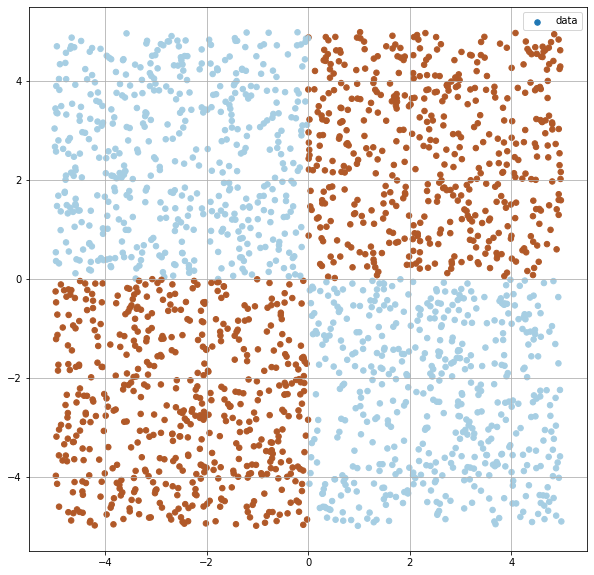

In [48]:
plot_binary(dataset)

In [49]:
model = SVC(kernel='poly', degree=2, tol=1e-7)

In [50]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-07, verbose=False)

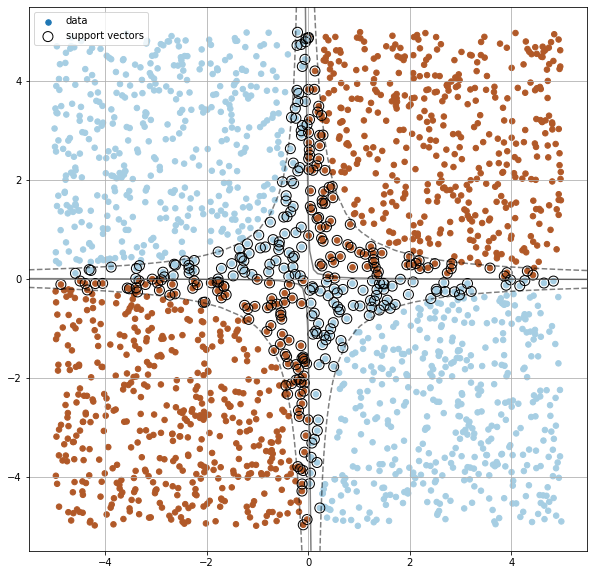

In [51]:
plot_binary(dataset, model)

In [108]:
dataset = generate_binary_dataset(-5, 5, 3000, lambda x, y: x * y * (np.abs(x) - np.abs(y)) > 0)
dataset.head()

x         y  target
0  0.423698 -0.442668     1.0
1 -1.575947 -0.799846     1.0
2  3.239009 -0.775354    -1.0
3  2.067933 -1.809793    -1.0
4 -1.663842 -2.308421    -1.0

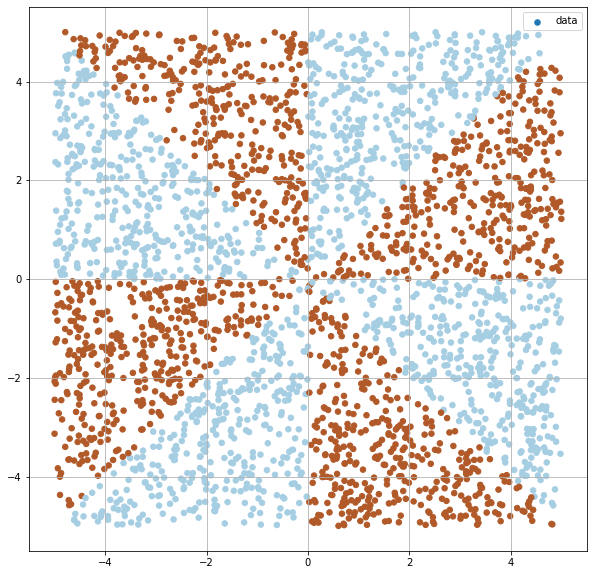

In [109]:
plot_binary(dataset)

In [110]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [{'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 5, 10]}]

# specify model
model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  

In [112]:
model_cv.fit(dataset[['x', 'y']], dataset.target)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done  75 out of  75 | elapsed:    6.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [1, 5, 10],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [114]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.069414      0.001851         0.010973        0.000632       1   
1        0.112704      0.007110         0.019145        0.002130       1   
2        0.279249      0.015454         0.037899        0.000892       1   
3        0.284054      0.016304         0.041687        0.002553       1   
4        0.271776      0.007129         0.047973        0.009784       1   
5        0.079490      0.013048         0.009176        0.002555       5   
6        0.111302      0.011171         0.014958        0.001784       5   
7        0.333903      0.012220         0.066822        0.032733       5   
8        0.379367      0.057246         0.055952        0.015572       5   
9        0.394068      0.042001         0.050367        0.009470       5   
10       0.067919      0.008800         0.009176        0.001717      10   
11       0.114689      0.013186         0.013369        0.003916      10   
12       0.327911      0.029477         0.038098        0.001163      10   
13       0.324527      0.037545         0.041994        0.010661      10   
14       0.271088      0.015681         0.036901        0.003568      10   

   param_gamma                      params  split0_test_score  \
0            1        {'C': 1, 'gamma': 1}           0.968333   
1          0.1      {'C': 1, 'gamma': 0.1}           0.940000   
2         0.01     {'C': 1, 'gamma': 0.01}           0.553333   
3        0.001    {'C': 1, 'gamma': 0.001}           0.508333   
4       0.0001   {'C': 1, 'gamma': 0.0001}           0.508333   
5            1        {'C': 5, 'gamma': 1}           0.976667   
6          0.1      {'C': 5, 'gamma': 0.1}           0.948333   
7         0.01     {'C': 5, 'gamma': 0.01}           0.625000   
8        0.001    {'C': 5, 'gamma': 0.001}           0.525000   
9       0.0001   {'C': 5, 'gamma': 0.0001}           0.508333   
10           1       {'C': 10, 'gamma': 1}           0.983333   
11         0.1     {'C': 10, 'gamma': 0.1}           0.955000   
12        0.01    {'C': 10, 'gamma': 0.01}           0.765000   
13       0.001   {'C': 10, 'gamma': 0.001}           0.523333   
14      0.0001  {'C': 10, 'gamma': 0.0001}           0.508333   

    split1_test_score  split2_test_score  ...  mean_test_score  \
0            0.966667           0.975000  ...         0.973667   
1            0.920000           0.943333  ...         0.937000   
2            0.536667           0.548333  ...         0.555000   
3            0.478333           0.513333  ...         0.497000   
4            0.536667           0.513333  ...         0.508667   
5            0.973333           0.976667  ...         0.978667   
6            0.943333           0.955000  ...         0.954000   
7            0.666667           0.680000  ...         0.654333   
8            0.483333           0.500000  ...         0.502333   
9            0.476667           0.513333  ...         0.496667   
10           0.971667           0.978333  ...         0.981000   
11           0.951667           0.956667  ...         0.959333   
12           0.706667           0.723333  ...         0.733000   
13           0.486667           0.515000  ...         0.501000   
14           0.480000           0.513333  ...         0.497333   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.005518                3            0.982083            0.980000   
1         0.008589                6            0.943333            0.936667   
2         0.014220                9            0.566250            0.547917   
3         0.012798               14            0.508750            0.497917   
4         0.016513               10            0.508750            0.501667   
5         0.005812                2            0.986250            0.988333   
6         0.007348                5            0.957500            0.958333   
7         0.023012                8            0.644583  

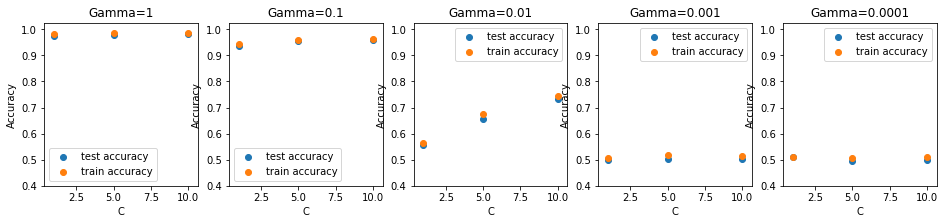

In [123]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,3))

for i in range(len(hyper_params[0]['gamma'])):
    plt.subplot(101 + 10 * len(hyper_params[0]['gamma']) + i)
    gamma = cv_results[cv_results['param_gamma'] == hyper_params[0]['gamma'][i]]

    plt.scatter(gamma["param_C"], gamma["mean_test_score"], label='test accuracy')
    plt.scatter(gamma["param_C"], gamma["mean_train_score"], label='train accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title(f"Gamma={hyper_params[0]['gamma'][i]}")
    plt.ylim([0.4, 1.025])

    plt.legend()

In [120]:
model_cv.best_score_

0.9810000000000001

In [121]:
model_cv.best_params_

{'C': 10, 'gamma': 1}

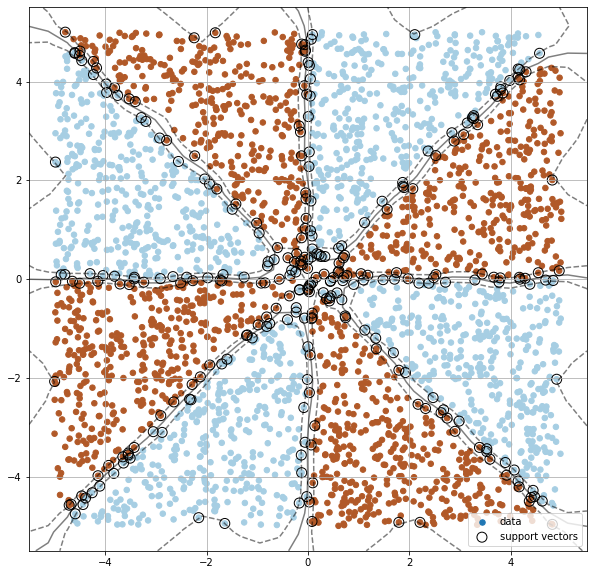

In [122]:
plot_binary(dataset, model_cv.best_estimator_)

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train = X_train.reshape(60000, 28 * 28).astype('float32') / 255
X_test = X_test.reshape(10000, 28 * 28).astype('float32') / 255

#### Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [12]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4], 'C': [5, 10]}]

# specify model
model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)  

In [13]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed: 277.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [18]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0     939.977054     14.513710       402.346043        3.567782       5   
1    1261.009300     39.522770       585.482721       86.400542       5   
2    2897.834649     45.617691       907.256302        9.880219       5   
3     913.593682    105.982031       422.710137       38.868092      10   
4    1001.112001     10.121563       450.532688       17.647825      10   
5    1571.037997    224.133007       602.890242       50.851582      10   

  param_gamma                      params  split0_test_score  \
0        0.01     {'C': 5, 'gamma': 0.01}           0.982667   
1       0.001    {'C': 5, 'gamma': 0.001}           0.948000   
2      0.0001   {'C': 5, 'gamma': 0.0001}           0.921750   
3        0.01    {'C': 10, 'gamma': 0.01}           0.982333   
4       0.001   {'C': 10, 'gamma': 0.001}           0.953583   
5      0.0001  {'C': 10, 'gamma': 0.0001}           0.928083   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.981500           0.983750  ...         0.981683        0.001379   
1           0.948000           0.949500  ...         0.948450        0.000552   
2           0.922833           0.926917  ...         0.923200        0.001908   
3           0.981500           0.984917  ...         0.981950        0.001688   
4           0.955417           0.955250  ...         0.954433        0.000824   
5           0.927583           0.932333  ...         0.929283        0.001699   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.998062            0.998042   
1                4            0.955667            0.954750   
2                6            0.925125            0.925604   
3                1            0.999500            0.999687   
4                3            0.963396            0.963354   
5                5            0.932708            0.933042   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.997792            0.998146            0.998125   
1            0.954542            0.954625            0.954937   
2            0.924562            0.925063            0.925625   
3            0.999583            0.999583            0.999521   
4            0.963208            0.963292            0.963812   
5            0.931396            0.931958            0.933000   

   mean_train_score  std_train_score  
0          0.998033         0.000127  
1          0.954904         0.000404  
2          0.925196         0.000394  
3          0.999575         0.000065  
4          0.963413         0.000210  
5          0.932421         0.000643  

[6 rows x 22 columns]

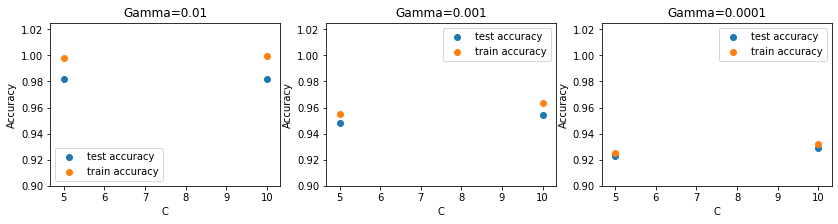

In [41]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(14,3))

for i in range(3):
    plt.subplot(131 + i)
    gamma = cv_results[cv_results['param_gamma'] == hyper_params[0]['gamma'][i]]

    plt.scatter(gamma["param_C"], gamma["mean_test_score"], label='test accuracy')
    plt.scatter(gamma["param_C"], gamma["mean_train_score"], label='train accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title(f"Gamma={hyper_params[0]['gamma'][i]}")
    plt.ylim([0.9, 1.025])

    plt.legend()

In [16]:
model_cv.best_score_

0.98195

In [17]:
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [26]:
y_pred = model_cv.best_estimator_.predict(X_test)
y_pred.shape

(10000,)

In [29]:
metrics.accuracy_score(y_test, y_pred)

0.9833

In [57]:
def draw(images, texts, columns=1, rows=1, image_size=28, scale=4):
    fig = plt.figure(figsize=(scale * columns, scale * rows))

    for i in range(columns * rows):
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_title(texts[i])
        ax.set_aspect('equal')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(images[i].reshape(image_size, image_size) * 255)

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_frame_on(False)
    plt.show()

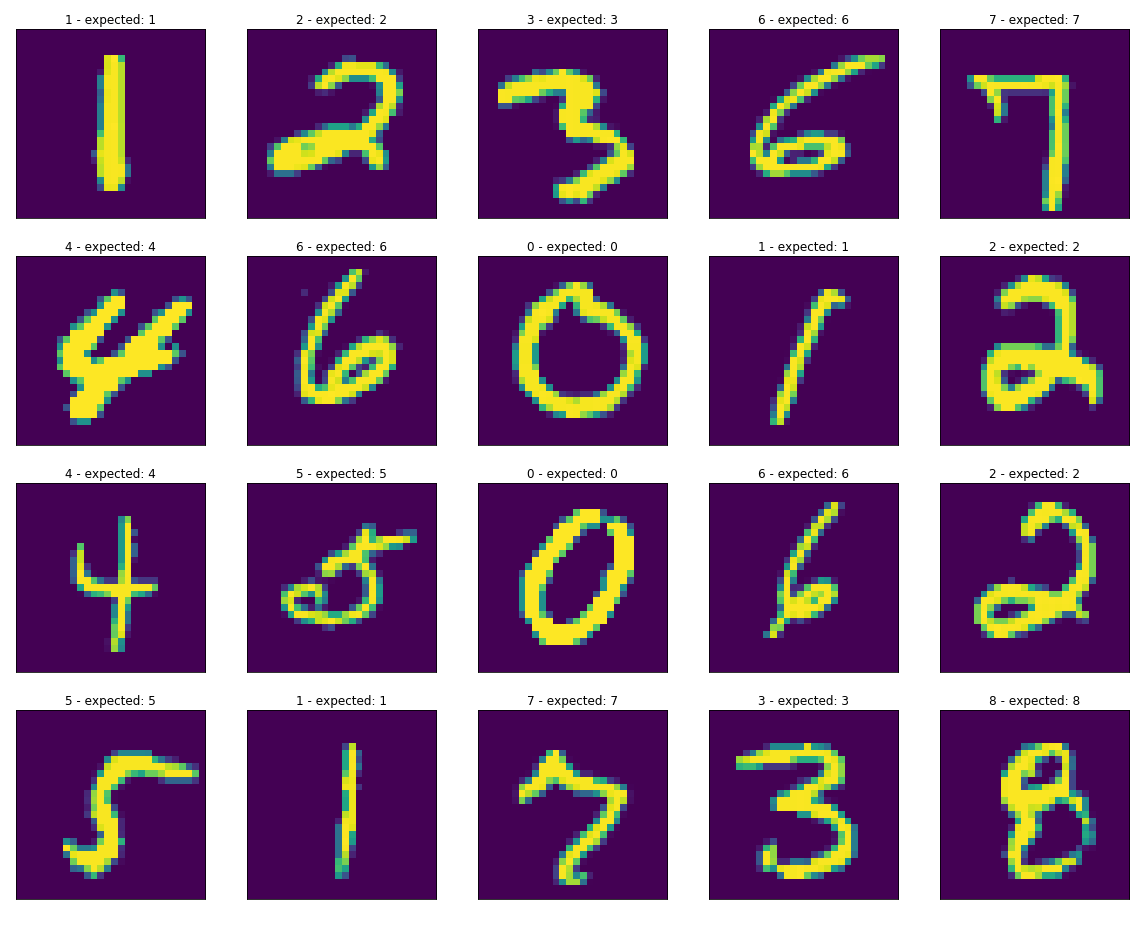

In [36]:
indices = np.random.choice(np.arange(len(X_test)), size=20)
images = X_test[indices]
predicted_digits = y_pred[indices]
texts = [f'{predicted_digits[i]} - expected: {y_test[indices[i]]}' for i in range(len(indices))]

draw(images, texts, 5, 4)

In [36]:
persianLPR = pd.read_csv('PersianLPR.csv')
persianLPR.head()

target  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      2      69      80      90      92      84      69      57      49   
1      2      78      92     120     135      92      50       0      28   
2      7      45      45      62      69      50      25      12       7   
3      3     117     120     123     122     118     117     117     120   
4      W      19      17      10      17      29      24      29      36   

   pixel8  ...  pixel246  pixel247  pixel248  pixel249  pixel250  pixel251  \
0      47  ...       139       135       116        86        55        39   
1      71  ...        78        85        85        78        64        57   
2       5  ...        69        79        84        79        62        52   
3     118  ...        90        72        33         5         0         2   
4      27  ...        80        49        27        22        15        17   

   pixel252  pixel253  pixel254  pixel255  
0        35        39        45        49  
1        50        57        57        85  
2        50        52        47        45  
3        12        15        13        17  
4        17        17        15        12  

[5 rows x 257 columns]

In [37]:
X = persianLPR.drop('target', axis=1).values.astype('float32') / 255
X.shape

(1500, 256)

In [38]:
y = persianLPR.target.values
y.shape

(1500,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

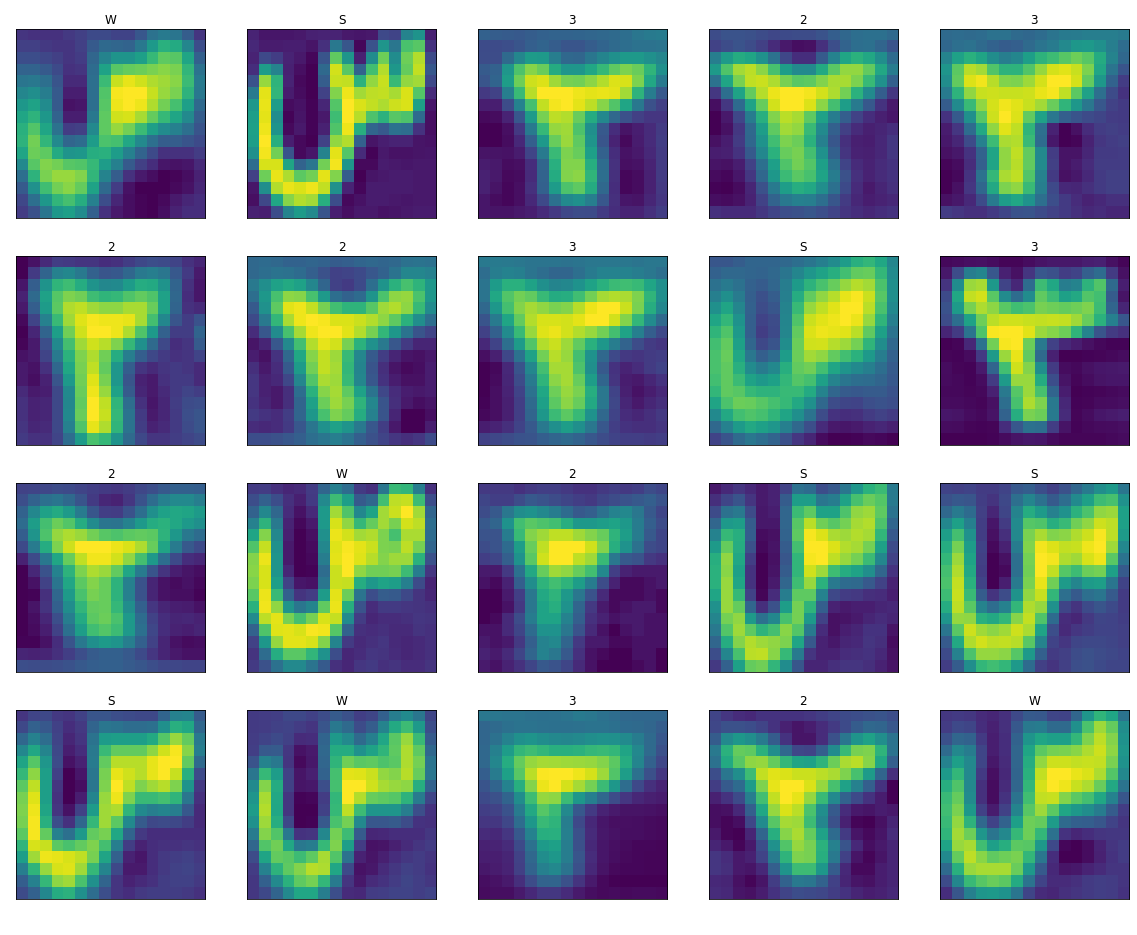

In [40]:
indices = np.random.choice(np.arange(len(X_train)), size=20)
images = X_train[indices]
labels = y_train[indices]

draw(images, labels, 5, 4, image_size=16)

In [41]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4], 'C': [5, 10]}]

# specify model
model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        n_jobs = 8,
                        return_train_score=True)

In [42]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    8.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.374998      0.027211         0.086168        0.007993       5   
1       0.576068      0.050154         0.238478        0.029940       5   
2       1.583990      0.229139         0.337003        0.051903       5   
3       0.366521      0.210114         0.087474        0.028025      10   
4       0.475847      0.067787         0.194300        0.049463      10   
5       0.940055      0.144141         0.187099        0.081524      10   

  param_gamma                      params  split0_test_score  \
0        0.01     {'C': 5, 'gamma': 0.01}           0.959259   
1       0.001    {'C': 5, 'gamma': 0.001}           0.903704   
2      0.0001   {'C': 5, 'gamma': 0.0001}           0.662963   
3        0.01    {'C': 10, 'gamma': 0.01}           0.962963   
4       0.001   {'C': 10, 'gamma': 0.001}           0.922222   
5      0.0001  {'C': 10, 'gamma': 0.0001}           0.696296   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0           0.948148           0.937037  ...         0.954074        0.012306   
1           0.888889           0.877778  ...         0.897778        0.012527   
2           0.477778           0.433333  ...         0.522222        0.080567   
3           0.955556           0.944444  ...         0.960000        0.009771   
4           0.929630           0.907407  ...         0.925185        0.009771   
5           0.696296           0.670370  ...         0.666667        0.032542   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.957407            0.962963   
1                4            0.900926            0.893519   
2                6            0.671296            0.473148   
3                1            0.970370            0.974074   
4                3            0.934259            0.929630   
5                5            0.712963            0.692593   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.968519            0.959259            0.961111   
1            0.909259            0.893519            0.907407   
2            0.426852            0.524074            0.602778   
3            0.975926            0.971296            0.970370   
4            0.944444            0.936111            0.933333   
5            0.626852            0.705556            0.638889   

   mean_train_score  std_train_score  
0          0.961852         0.003813  
1          0.900926         0.006651  
2          0.539630         0.087982  
3          0.972407         0.002222  
4          0.935556         0.004920  
5          0.675370         0.035513  

[6 rows x 22 columns]

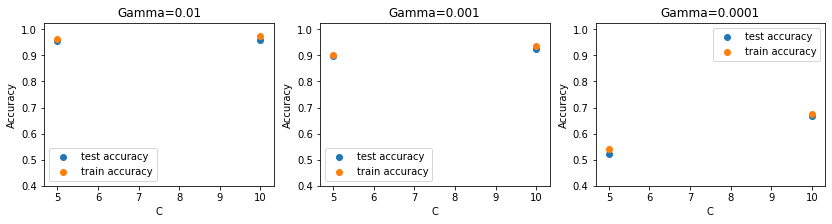

In [46]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(14,3))

for i in range(3):
    plt.subplot(131 + i)
    gamma = cv_results[cv_results['param_gamma'] == hyper_params[0]['gamma'][i]]

    plt.scatter(gamma["param_C"], gamma["mean_test_score"], label='test accuracy')
    plt.scatter(gamma["param_C"], gamma["mean_train_score"], label='train accuracy')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title(f"Gamma={hyper_params[0]['gamma'][i]}")
    plt.ylim([0.4, 1.025])

    plt.legend()

In [47]:
model_cv.best_score_

0.96

In [48]:
model_cv.best_params_

{'C': 10, 'gamma': 0.01}

In [49]:
model = SVC(kernel='rbf', **model_cv.best_params_)

In [51]:
model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
y_pred = model.predict(X_test)
y_pred.shape

(150,)

In [53]:
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

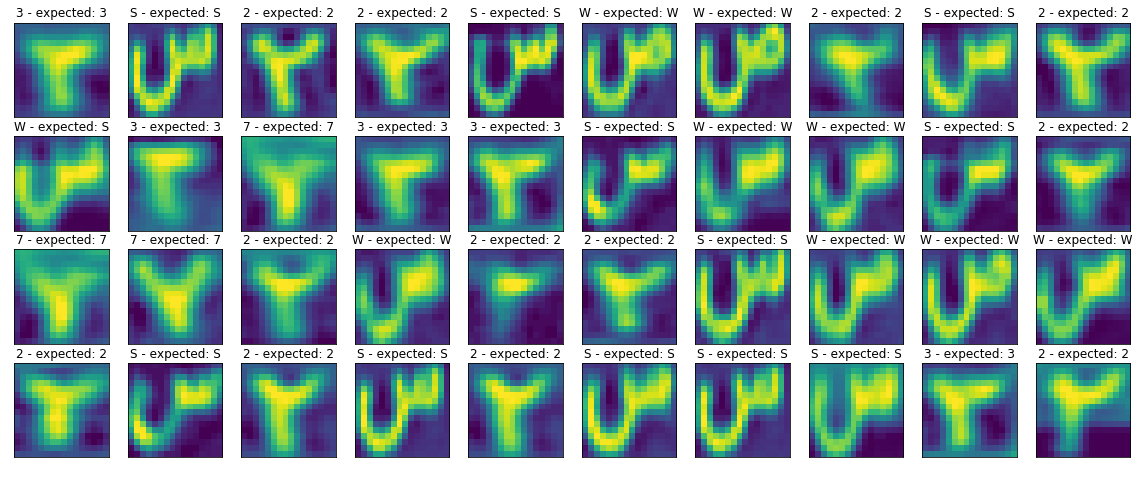

In [59]:
indices = np.random.choice(np.arange(len(X_test)), size=40)
images = X_test[indices]
predicted_digits = y_pred[indices]
texts = [f'{predicted_digits[i]} - expected: {y_test[indices[i]]}' for i in range(len(indices))]

draw(images, texts, 10, 4, image_size=16, scale=2)